In [2]:
from scapy.all import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [3]:
paquetes = rdpcap('../datos/sniff_ethernet.cap')

In [4]:
freq = {}
paquetes = paquetes.filter(lambda pkt: pkt.getlayer(1) != None and Ether in pkt)
for pkt in paquetes:
    # Ethernet
    tipo = 'broadcast' if pkt[Ether].dst == 'ff:ff:ff:ff:ff:ff' else 'unicast'
    proto = pkt.getlayer(1).name

    # Wifi
    #

    freq[(tipo,proto)] = freq[(tipo,proto)] + 1 if (tipo,proto) in freq else 0

entropia = 0
for k in freq:
        p = freq[k] / len(paquetes) 
        entropia += -p * math.log(p)

max_entropia = math.log(len(freq))

In [5]:
tablainfo = pd.Series(data = freq).to_frame(name = "Cantidad de Paquetes")
tablainfo.index = tablainfo.index.set_names(["Tipo","Protocolo"])
tablainfo['Información[Bits]'] = tablainfo['Cantidad de Paquetes'].apply(lambda x: np.log(len(paquetes)/x))
tablainfo.sort_values('Información[Bits]', inplace = True, ascending = False)
tablainfo

Cantidad de Paquetes  Información[Bits]
Tipo      Protocolo                                         
unicast   LLC                           1          11.512645
          EAPOL                         7           9.566735
broadcast ARP                         176           6.342161
unicast   IPv6                       2125           3.851118
broadcast IP                         2731           3.600222
unicast   ARP                        9946           2.307720
          IP                        84979           0.162486

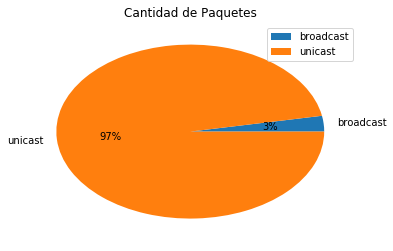

In [16]:
unibroad = pd.Series(data = freq).to_frame(name = "Cantidad de Paquetes").reset_index(level = 1, drop = True)
unibroad = unibroad.reset_index().groupby('index').agg('sum')
unibroad.plot(y = 'Cantidad de Paquetes', kind = 'pie', autopct='%1.0f%%', title='Cantidad de Paquetes').set_ylabel('')
plt.show()